Importing Libraries

In [ ]:
# Importing necessary library 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.datasets import fetch_lfw_people 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 



Data Preprocessing

In [ ]:
# reading lfw dataset with minimum 70 faces so as to reduce overfitting
dataset = fetch_lfw_people(min_faces_per_person = 70, resize = 1) 
datapoints, h, w = dataset.images.shape 
print('heights and widths of facial images :',h, w)

#fetching value to X in a vectorized format instead of 2D array
X = dataset.data 
n_features = X.shape[1] 
print('data shape after flattening(number_of_rows,image_height*image_width)',X.shape)

# Id of the person is the label that will be useful in prediction
y = dataset.target 
names = dataset.target_names 
n_classes = names.shape[0] 

# output the details of the lfw dataset 

print("Class Labels (Total number): % d" % n_classes) 
print("Data Sample (Total number): % d" % datapoints) 
print("Data Sample size: % d" % n_features) 

# the label to predict is the id of the person 
y = dataset.target 
names = dataset.target_names 
n_classes = names.shape[0] 

# Print Details about dataset 
print("Number of Data Samples: % d" % datapoints) 
print("Size of a data sample: % d" % n_features) 
print("Number of Class Labels: % d" % n_classes) 

heights and widths of facial images : 125 94
data shape after flattening(number_of_rows,image_height*image_width) (1288, 11750)
Class Labels (Total number):  7
Data Sample (Total number):  1288
Data Sample size:  11750
Number of Data Samples:  1288
Size of a data sample:  11750
Number of Class Labels:  7


Plotting Images

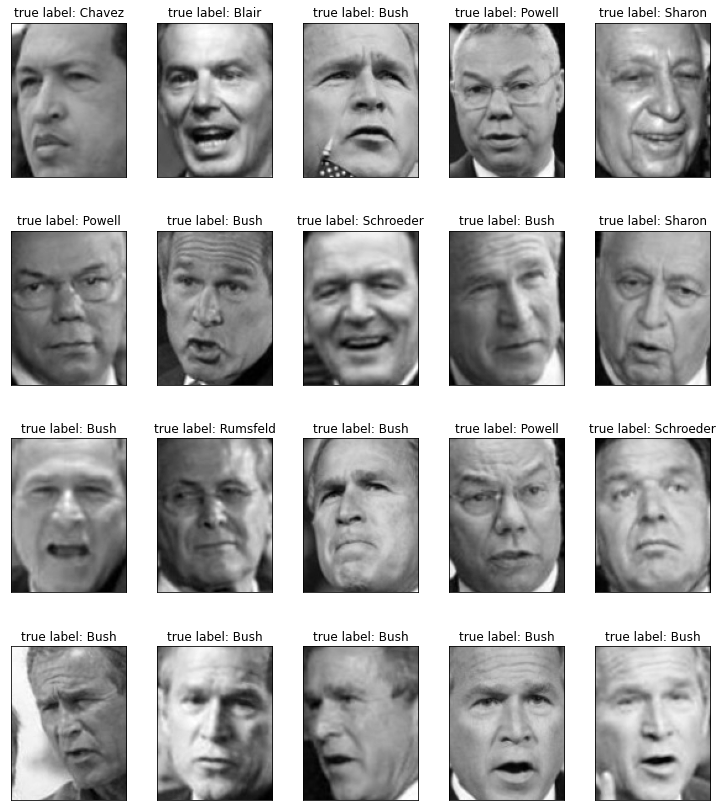

In [ ]:
# plotting images that help understand the dataset better
def plot_gallery(images, title, h, w, n_row = 4, n_col = 5): 
	plt.figure(figsize =(2 * n_col, 3 * n_row)) 
	plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35) # providing dimensions of images to be printed
	for i in range(n_row * n_col): 
		plt.subplot(n_row, n_col, i + 1) 
		plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray) # converting it into grey scale
		plt.title(title[i], size = 12) 
		plt.xticks(()) 
		plt.yticks(()) 

# outputing the respective true labels of the images printed
def title(Y, names, i): 
	true_name = names[Y[i]].rsplit(' ', 1)[-1] 
	return 'true label: % s' % (true_name) 
 
#calling the function defined
titles = [title(y, names, i) 
					for i in range(y.shape[0])] 
plot_gallery(X, titles, h, w) 


Plotting Class distribution

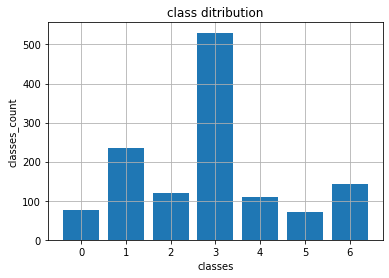

In [ ]:
# class distribution plot
from collections import Counter 
y_count = Counter(y)
plt.grid()
plt.bar(y_count.keys(),y_count.values())
plt.xlabel('classes')
plt.ylabel('classes_count')
plt.title('class ditribution')
plt.show()

Train and Test split

In [ ]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split( 
	X, y, test_size = 0.25, random_state = 42,stratify = y) 
print("Training Data size:  % d , and Testing Data Size: % d" %( 
		y_train.shape[0], y_test.shape[0])) 

Training Data size:   966 , and Testing Data Size:  322


Individual Class Weigths

In [ ]:
# computing class weights
from sklearn.utils.class_weight import compute_class_weight
z = compute_class_weight('balanced',np.unique(y_train),y_train)

weight = dict(zip(range(len(z)),iter(z)))

print(weight)

{0: 2.3793103448275863, 1: 0.7796610169491526, 2: 1.5164835164835164, 3: 0.34760705289672544, 4: 1.6829268292682926, 5: 2.6037735849056602, 6: 1.2777777777777777}


**Dimension Reduction 1 -- PCA**

In [ ]:
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import TruncatedSVD

# number of components have been increased from 80 to 150
n_components = 150

pca = PCA(n_components = n_components, svd_solver ='randomized', whiten = True)

# training data for PCA
X_train_pca = pca.fit_transform(X_train) 

# reshaping the components
eigenfaces = pca.components_.reshape((n_components, h, w)) 

X_test_pca = pca.transform(X_test) 
print('After Transformation')
print('X train : ' ,X_train_pca.shape)
print('X test  : ' ,X_test_pca.shape)

print('explained variance per feature:\n',pca.explained_variance_ratio_)

After Transformation
X train :  (966, 150)
X test  :  (322, 150)
explained variance per feature:
 [0.16964026 0.14000522 0.06604508 0.0568402  0.04753254 0.0308888
 0.02428193 0.02071771 0.01986706 0.01878294 0.01569218 0.01479424
 0.012406   0.01038281 0.01022537 0.00961214 0.00909164 0.00889664
 0.00781563 0.00703039 0.00666293 0.00656353 0.0060385  0.00594588
 0.00558279 0.00546603 0.00513755 0.00474924 0.00454827 0.00435856
 0.00409691 0.00393039 0.00388217 0.00373423 0.00362712 0.00353758
 0.00336022 0.00326368 0.00308599 0.00301469 0.00296959 0.00285346
 0.0027691  0.00275813 0.00261973 0.00255228 0.00252761 0.00243678
 0.00234979 0.00227286 0.00221666 0.00219941 0.00216125 0.0021245
 0.00206708 0.00203948 0.00201105 0.0019699  0.00190628 0.00186925
 0.00185131 0.00176955 0.00174063 0.00168295 0.00167966 0.00166403
 0.00162102 0.00157385 0.00155042 0.00153563 0.00151629 0.00147182
 0.00145097 0.00143223 0.00140786 0.00138569 0.00137011 0.00132827
 0.00130882 0.00130116 0.00128256

### plotting eigen faces

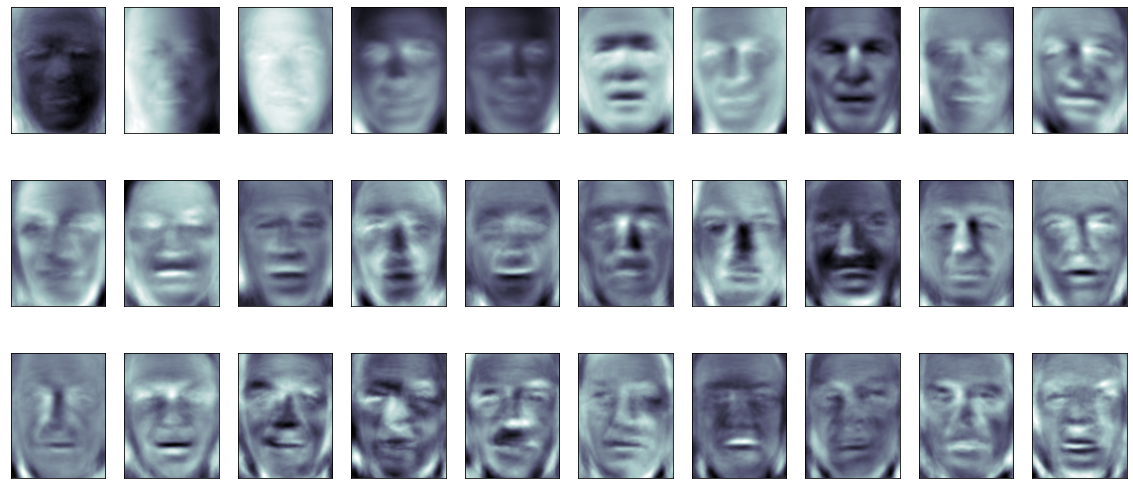

In [ ]:
# plotting eigen faces
figu = plt.figure(figsize=(20, 9))
for i in range(30):
    ax = figu.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((h, w)),
              cmap=plt.cm.bone)

### percentage variance/information retained v/s features

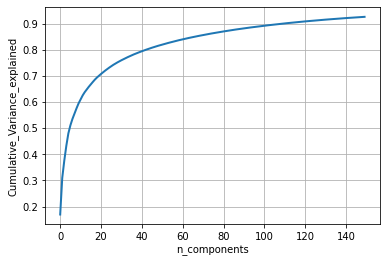

In [ ]:
var_explained = pca.explained_variance_ratio_;  
cum_var=np.cumsum(var_explained)#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [ ]:
print("Sampling the datapoints after PCA is applied \n", X_train_pca[0]) 

Sampling the datapoints after PCA is applied 
 [-0.36761016  0.10872275 -0.45884702  0.91959447 -0.3069963   0.48958975
 -0.739483    0.8418671   0.5372924   0.61955667 -0.2952375  -0.00643905
  0.10292177  0.4318123   1.8518156  -0.6455547  -0.84845215 -1.6237537
  1.258139    0.0498342   0.21204506  0.5367611  -0.32282332  0.6243028
  0.9577901   0.9403146  -0.57245535  0.5197115  -0.49125612 -0.93155384
 -0.40169677 -0.02617902 -0.4413376   1.8020049  -0.3224535   0.34929436
 -2.1499984  -0.08737748  0.7528141  -1.4805474   0.9163921   0.05400775
 -0.6678072  -1.8396537  -0.18748741  3.3916671  -0.9749241  -0.5678416
 -0.12366298  0.12939408 -0.0985845   0.30712208 -1.7710547   0.86237746
  0.5056501  -0.46162257  2.6720076  -0.715516   -0.7511367   0.78541344
 -0.58460826 -0.59346414  0.44927377 -0.14780946  1.2185943  -0.02887391
  0.8777804   0.46984917 -1.5096941   0.81980133 -1.4779553   0.4181263
 -0.6824287  -0.15207577 -1.0195738   0.36740804 -0.10123823 -0.09097946
  2.5610

**Dimension Reduction 2 -- LLE**

In [ ]:
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import TruncatedSVD

# number of components selected is 150 as that is the amount with most data absorption 
n_components = 150

# using lle library functionality as the other dimensionality reduction
lle = LocallyLinearEmbedding(n_components=n_components,n_neighbors=80,n_jobs=-1)

# train and test data transformation for lle
X_train_lle = lle.fit_transform(X_train) 
X_test_lle = lle.transform(X_test) 
print('reconstruction error :',lle.reconstruction_error_)

reconstruction error : 16.425288953192265


Data Reshape and conversion to categorical for **CNN**

In [ ]:
import tensorflow as tf

# converting test and train label data categorically so that there is less overfitting
y_train =tf.keras.utils.to_categorical(y_train,num_classes=len(np.unique(y))) 
y_test =tf.keras.utils.to_categorical(y_test,num_classes=len(np.unique(y)))

# reshaping the images to fit the CNN dense layer
X_train = X_train.reshape(-1,dataset.images.shape[1],dataset.images.shape[2])
X_test = X_test.reshape(-1,dataset.images.shape[1],dataset.images.shape[2])

# printing the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(966, 125, 94)
(322, 125, 94)
(966, 7)
(322, 7)


**CNN Layer**

In [ ]:
# importing necessary libraries for the CNN dense structure and subsequent ensemble model
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Concatenate,Input,MaxPooling2D,Flatten,BatchNormalization,Dropout

# initialising the seed for CNN
seed=1
np.random.seed(seed)
tf.random.set_seed(seed)

# initialising the various inputs that will be a part of the CNN structure
input0 = Input(shape = (dataset.images.shape[1],dataset.images.shape[1],1))
input1 = Input(shape = (150,))
input2 = Input(shape = (150,))

# extracting features of VGG16 model
model= tf.keras.applications.VGG16(
     include_top=False,
     weights=None,
     input_shape=(dataset.images.shape[1],dataset.images.shape[2],1),
     pooling=max)

# dropout layer is added after each pooling layer to overrcome overfitting
updated_model = Sequential()
for layer in model.layers:
    updated_model.add(layer)
    if layer.name in ['block1_pool', 'block2_pool','block3_pool','block4_pool' ]:
        updated_model.add(Dropout(.3))

model = updated_model

x = Flatten()(model.output)
x = Dropout(.4)(x)
x = Concatenate(axis=-1)([x,input1,input2])
x = Dense(units=512,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),kernel_regularizer=None)(x) 
# x = BatchNormalization()(x)
x = Dense(units=128,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),bias_regularizer=None)(x)
x = Dropout(.4)(x)
x = Dense(units=32,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),bias_regularizer=None)(x)
x = BatchNormalization()(x)
x = Dropout(.4)(x)

x = Dense(units=16,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),bias_regularizer=None)(x)

preds=Dense(len(np.unique(y)),activation='softmax')(x)

model = Model(inputs=(input1,input2,model.input),outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 125, 94, 1)] 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 125, 94, 64)  640         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 125, 94, 64)  36928       block1_conv1[1][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 62, 47, 64)   0           block1_conv2[1][0]               
______________________________________________________________________________________________

In [ ]:
!pip install tensorflow-addons
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import tensorflow_addons as tfa
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy',tfa.metrics.F1Score(num_classes=len(np.unique(y)), threshold=0.5,average = 'micro')])

def scheduler(epoch, lr):
  if epoch > 350:
    return lr* 0.01
  else:
    return lr 

# early stopping and reducing the learning rate eventually so that accuracy is improved with every run
monitor = EarlyStopping(monitor='f1_score', min_delta=0.0001, patience=500, 
                        verbose=1, mode='max', restore_best_weights=False,baseline=0.910)
reduce_lr = ReduceLROnPlateau(monitor='val_f1_score', factor=0.01, mode='max',
                              patience=300, min_lr=0.000001,verbose=1)
schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)
callback =[monitor,reduce_lr,schedule]

     |████████████████████████████████| 706kB 8.3MB/s 


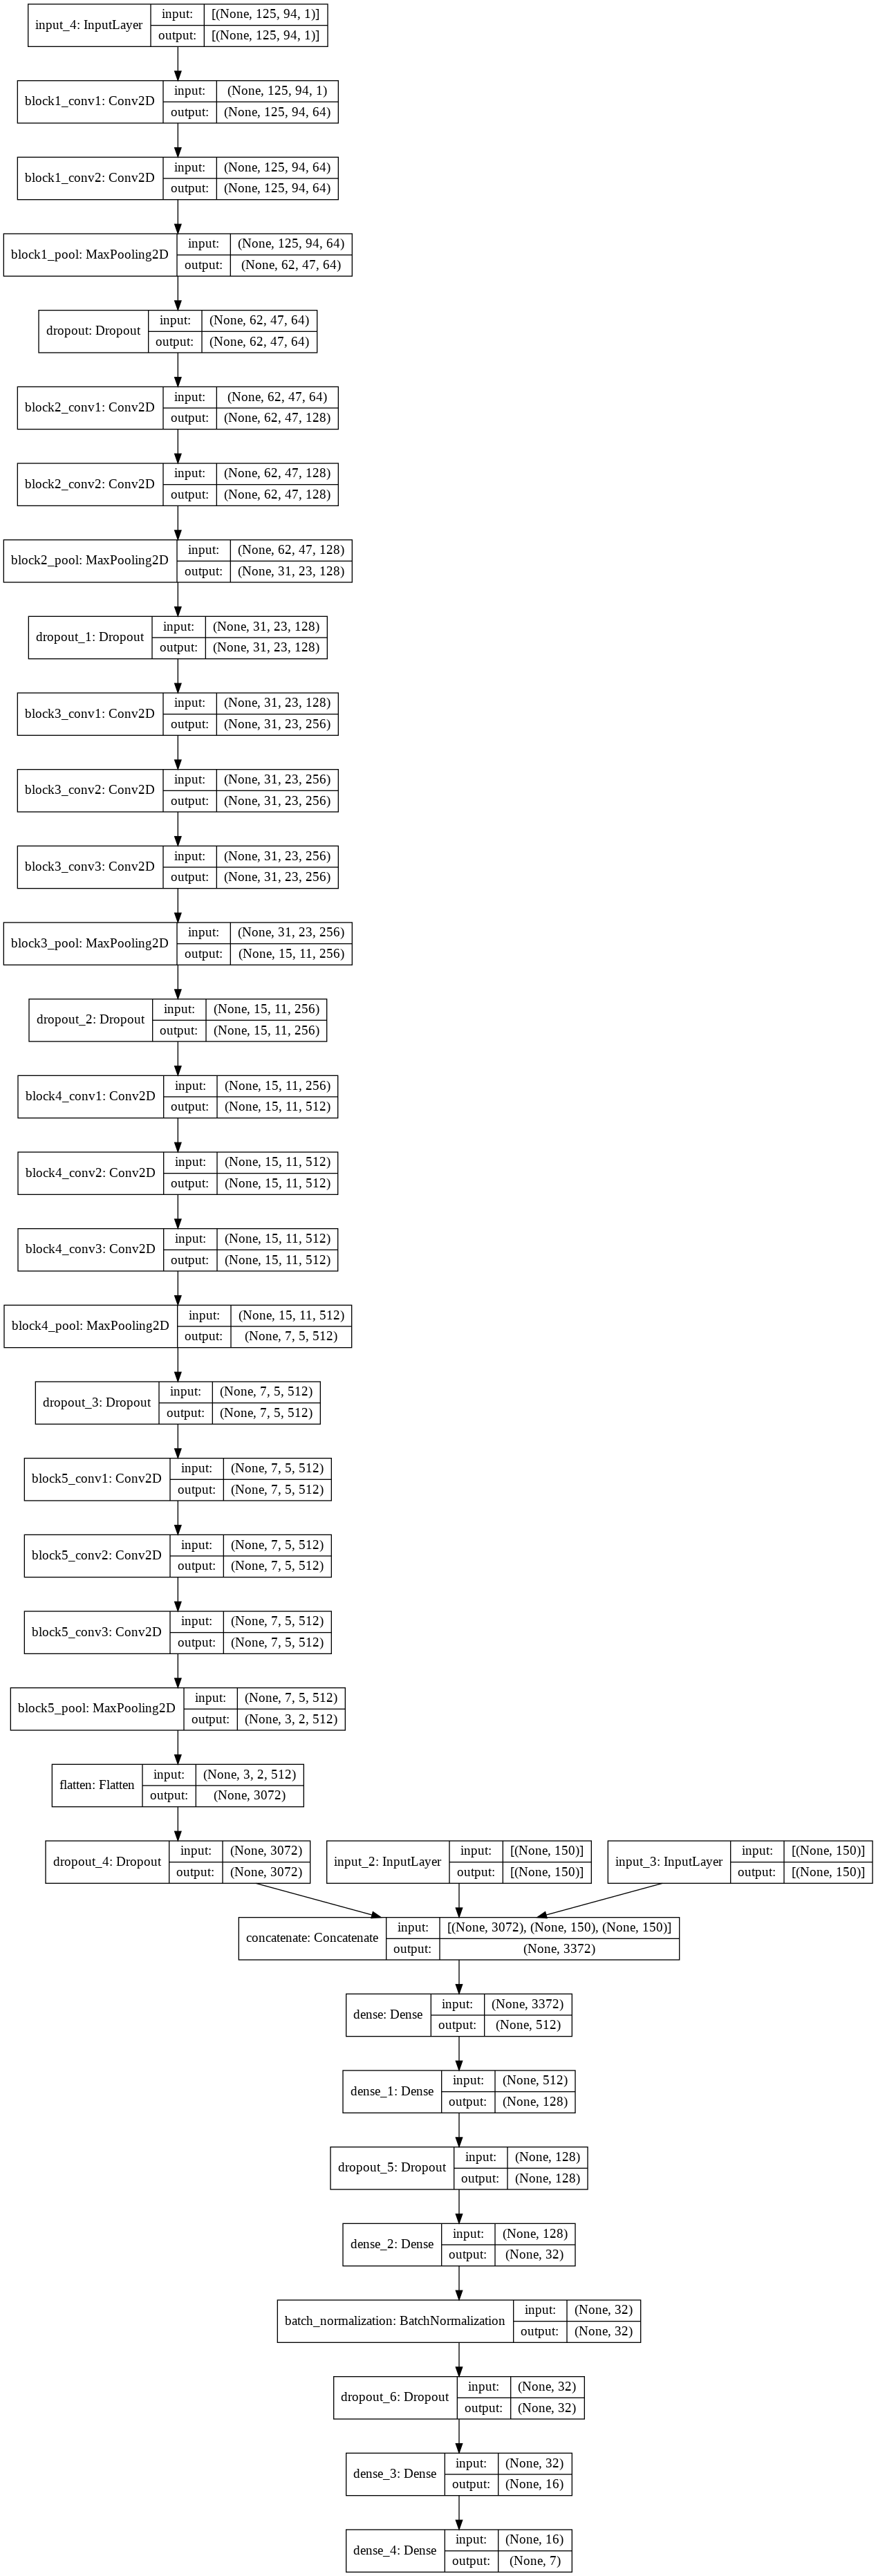

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

**Ensemble Model run**

In [ ]:
# image vectors extracted after using PCA and LLE are combined while running the CNN dense layer 
model_history = model.fit((X_train_pca,X_train_lle,X_train),y_train,batch_size=64,epochs=400,
                    validation_data=((X_test_pca,X_test_lle,X_test),y_test),callbacks = callback,class_weight=weight)

Epoch 1/400
16/16 [==============================] - 44s 356ms/step - loss: 2.2751 - accuracy: 0.1348 - f1_score: 0.0342 - val_loss: 2.0546 - val_accuracy: 0.0932 - val_f1_score: 0.0000e+00
Epoch 2/400
16/16 [==============================] - 3s 208ms/step - loss: 2.2804 - accuracy: 0.1629 - f1_score: 0.0322 - val_loss: 1.9369 - val_accuracy: 0.0932 - val_f1_score: 0.0000e+00
Epoch 3/400
16/16 [==============================] - 3s 207ms/step - loss: 2.1818 - accuracy: 0.1795 - f1_score: 0.0358 - val_loss: 1.9480 - val_accuracy: 0.0932 - val_f1_score: 0.0000e+00
Epoch 4/400
16/16 [==============================] - 3s 208ms/step - loss: 2.2973 - accuracy: 0.1070 - f1_score: 0.0238 - val_loss: 1.8985 - val_accuracy: 0.3602 - val_f1_score: 0.0000e+00
Epoch 5/400
16/16 [==============================] - 3s 209ms/step - loss: 2.2110 - accuracy: 0.1391 - f1_score: 0.0275 - val_loss: 1.9439 - val_accuracy: 0.0807 - val_f1_score: 0.0000e+00
Epoch 6/400
16/16 [==============================] - 3

Plotting Accuracy and F1 score Graphs

dict_keys(['loss', 'accuracy', 'f1_score', 'val_loss', 'val_accuracy', 'val_f1_score', 'lr'])


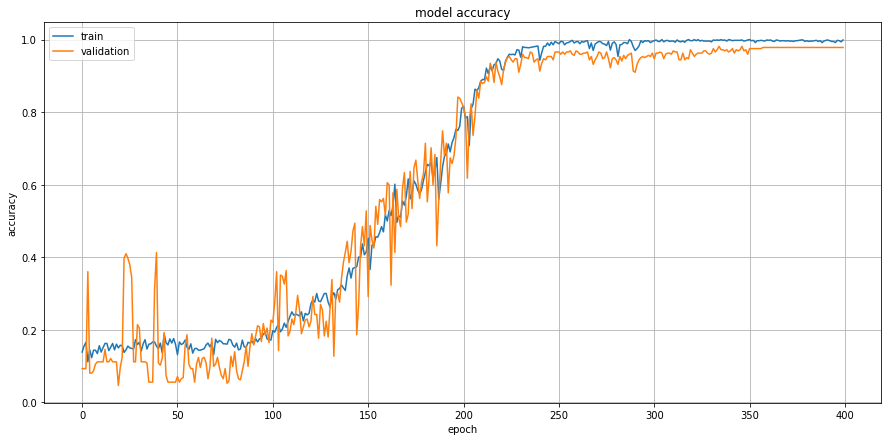

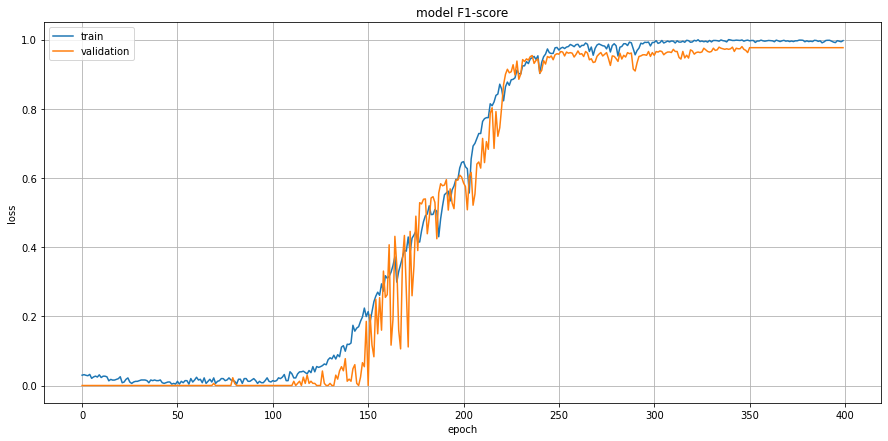

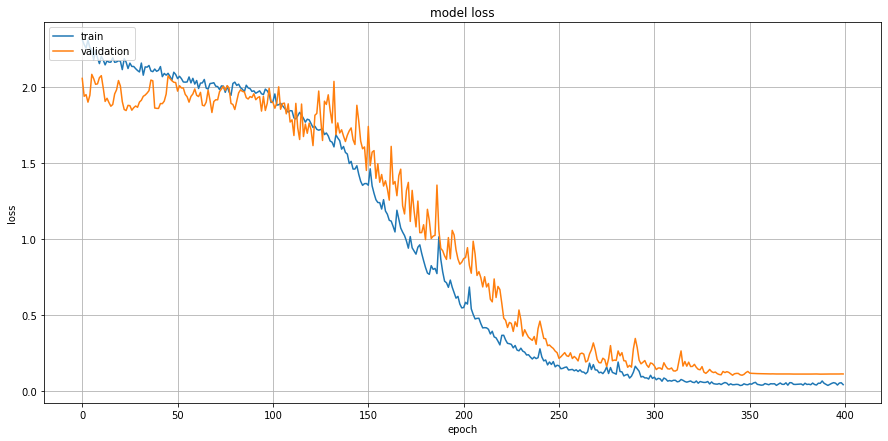

In [ ]:
plt.figure(figsize = (15,7))
print(model_history.history.keys())
#  Graph - Accuracy
plt.grid()
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['curacy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('accuracy')

# "f1"
plt.figure(figsize = (15,7))
plt.grid()
plt.plot(model_history.history['f1_score'])
plt.plot(model_history.history['val_f1_score'])
plt.title('model F1-score')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig('f1.png')
# "Loss"

plt.figure(figsize = (15,7))
plt.grid()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig('loss')